# Inicialização

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os.path

np.random.seed(42)

In [31]:
ROOT = os.path.abspath('..')
DATA = os.path.join(ROOT, 'data', 'processed')
DATA_TARGET = os.path.join(ROOT, 'data', 'external')
df = pd.read_csv(os.path.join(DATA, 'train.csv'))
df_test = pd.read_csv(os.path.join(DATA, 'test.csv'))
df_target = pd.read_csv(os.path.join(DATA_TARGET, 'sample_submission.csv'))

In [28]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1.0,44,1,28.0,0,2.0,1.0,40454.0,26.0,217,1
1,2,1.0,76,1,3.0,0,0.0,0.0,33536.0,26.0,183,0
2,3,1.0,47,1,28.0,0,2.0,1.0,38294.0,26.0,27,1
3,4,1.0,21,1,11.0,1,1.0,0.0,28619.0,152.0,203,0
4,5,0.0,29,1,41.0,1,1.0,0.0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1.0,74,1,26.0,1,0.0,0.0,30170.0,26.0,88,0
381105,381106,1.0,30,1,37.0,1,1.0,0.0,40016.0,152.0,131,0
381106,381107,1.0,21,1,30.0,1,1.0,0.0,35118.0,160.0,161,0
381107,381108,0.0,68,1,14.0,0,2.0,1.0,44617.0,124.0,74,0


In [29]:
df_test

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,1.0,25,1,11.0,1,1.0,0.0,35786.0,152.0,53
1,381111,1.0,40,1,28.0,0,0.0,1.0,33762.0,7.0,111
2,381112,1.0,47,1,28.0,0,0.0,1.0,40050.0,124.0,199
3,381113,1.0,24,1,27.0,1,1.0,1.0,37356.0,152.0,187
4,381114,1.0,27,1,28.0,1,1.0,0.0,59097.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,0.0,26,1,37.0,1,1.0,0.0,30867.0,152.0,56
127033,508143,0.0,38,1,28.0,0,0.0,1.0,28700.0,122.0,165
127034,508144,1.0,21,1,46.0,1,1.0,0.0,29802.0,152.0,74
127035,508145,1.0,71,1,28.0,1,0.0,0.0,62875.0,26.0,265


In [32]:
df_target

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0
...,...,...
127032,508142,0
127033,508143,0
127034,508144,0
127035,508145,0


# Baseline

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_roc_curve
from yellowbrick.classifier import ConfusionMatrix

In [35]:
classes = {0:'nao interessado', 1:'interessado'}

# X = df.drop(labels=['id', 'Response'], axis=1)
# y = df['Response']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42)


X_train = df.drop(labels=['id', 'Response'], axis=1)
X_test = df_test.drop(labels=['id'], axis=1)
y_train = df['Response']
y_test = df_target['Response']

In [36]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

# Métricas

In [37]:
result = rfc.predict(X_test)

In [47]:
y_test.value_counts()

0    127037
Name: Response, dtype: int64

In [45]:
np.unique(result, return_counts= True)

(array([0, 1]), array([121630,   5407]))

In [50]:
cm = confusion_matrix(y_test, result)

In [51]:
TP = cm[1][1]
FP = cm[1][0]
TN = cm[0][0]
FN = cm[0][1]

acc = (TP + TN) / (TP + TN + FP + FN)
acc

0.9574375969205822

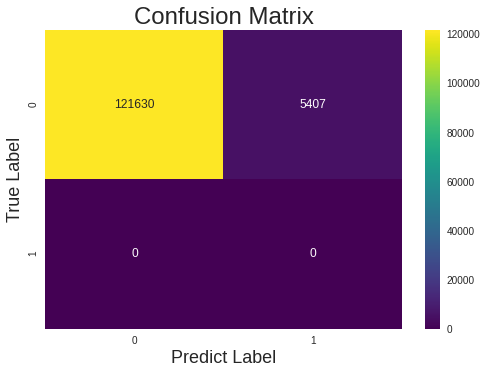

In [52]:
sns.heatmap(data=confusion_matrix(y_test, result), annot=True, fmt='g', cmap='viridis')
plt.title('Confusion Matrix', fontsize= 24)
plt.xlabel('Predict Label', fontsize= 18)
plt.ylabel('True Label', fontsize= 18);

In [56]:
print (pd.crosstab(y_test, result, rownames=['Real'], colnames=['      Predito'], margins=True)

      Predito       0     1     All
Real                               
0              121630  5407  127037
All            121630  5407  127037


In [62]:
classes

{0: 'nao interessado', 1: 'interessado'}

In [61]:
print(classification_report(y_test, result, zero_division= True, target_names=classes.values()))

                 precision    recall  f1-score   support

nao interessado       1.00      0.96      0.98    127037
    interessado       0.00      1.00      0.00         0

       accuracy                           0.96    127037
      macro avg       0.50      0.98      0.49    127037
   weighted avg       1.00      0.96      0.98    127037



Interpretar métricas <br>
https://medium.com/kunumi/m%C3%A9tricas-de-avalia%C3%A7%C3%A3o-em-machine-learning-classifica%C3%A7%C3%A3o-49340dcdb198

In [64]:
from yellowbrick.classifier import ROCAUC

/home/weslley/.pyenv/versions/3.8.2/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
/home/weslley/.pyenv/versions/3.8.2/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:803: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn("No negative samples in y_true, "
/home/weslley/.pyenv/versions/3.8.2/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:89: RuntimeWarning: invalid value encountered in less
  if np.any(dx < 0):


ValueError: Found input variables with inconsistent numbers of samples: [127037, 254074]

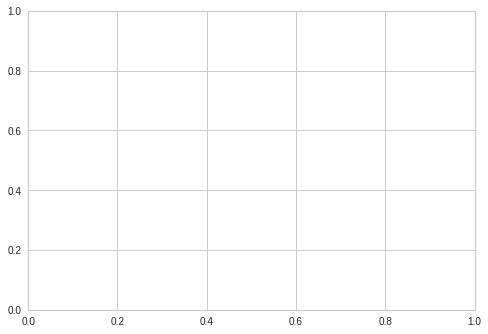

In [65]:
visualizer = ROCAUC(rfc, classes=["nao interessado", "interessado"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();

plot graph https://www.scikit-yb.org/en/latest/api/classifier/rocauc.html

Interpretar ROC e AUC <br>
https://medium.com/bio-data-blog/entenda-o-que-%C3%A9-auc-e-roc-nos-modelos-de-machine-learning-8191fb4df772 <br>
https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5 <br>
https://towardsdatascience.com/understanding-the-roc-curve-and-auc-dd4f9a192ecb

## Verificando as features mais importantes

In [ ]:
featureImp = []
for feat, importance in zip(X_train.columns, rfc.feature_importances_):  
    temp = [feat, importance*100]
    featureImp.append(temp)

feature_importances = pd.DataFrame(featureImp, columns = ['Feature', 'Importance'])
feature_importances.set_index(['Feature'], inplace= True)
feature_importances.sort_values('Importance', ascending = True).plot(kind='barh', figsize=(8,6))
plt.title('Features Importantes')
plt.xlabel('Score das features');

# Estruturando pipeline